# Atividade somativa 1 da disciplina de Machine Learning

O notebook criado apresentará os seguintes objetivos:
1) Crie um notebook em Jupyter utilizando python.
2) Dentro desse notebook, carregue um dos datasets disponíveis abaixo.
3) Depois de carregar esse dataset, execute o passo de preparação dos dados:
   - Você precisará obrigatoriamente aplicar uma técnica de seleção de atributos ou de extração de atributos.
   - Você poderá também aplicar de forma opcional outras técnicas em conjunto.
4) Depois de realizar a preparação dos dados, faça a divisão do seu dataset entre uma base de treinamento e outra de teste. A base de treinamento deverá ter 75% da base original e a base de teste terá os 25% restantes.
5) Para o dataset que escolheu, defina se o problema é de classificação, regressão ou previsão de séries temporais. Justifique a sua escolha dentro do notebook.
6) Depois de definir o problema, faça o treinamento de um algoritmo de aprendizagem supervisionada utilizando uma técnica de uma das bibliotecas vistas anteriormente.
7) Após finalizar o treinamento, mostre a predição para a base de teste.

## Imports

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ydata_profiling import ProfileReport # Biblioteca para análise exploratória de dados
from collections import Counter
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
%matplotlib inline

## Carregando a base de dados

In [8]:
df_nba = pd.read_csv('nba_stats.csv') # Carrega o dataset

## Informações gerais do df

In [ ]:
df_nba.head() # Exibe as 5 primeiras instâncias

In [ ]:
df_nba.sample(10) # Exibe, nesse caso, 10 instâncias aleatórias do df

In [ ]:
df_nba.describe() # Exibe estatísitica descritiva do df

In [ ]:
df_nba.dtypes # Retorna os dtypes (tipos de dados) do df

In [23]:
df_nba.info() # Exibe informações sobre o df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24624 entries, 0 to 24623
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ano                           24624 non-null  int64  
 1   Posicao                       24624 non-null  object 
 2   Idade                         24616 non-null  float64
 3   Jogos                         24624 non-null  int64  
 4   TrueShootingPercentage        24538 non-null  float64
 5   FreeThrowRate                 24525 non-null  float64
 6   OffensiveWinShares            24585 non-null  float64
 7   DefensiveWinShares            24585 non-null  float64
 8   WinShares                     24585 non-null  float64
 9   FieldGoals                    24624 non-null  int64  
 10  FieldGoalAttempts             24624 non-null  int64  
 11  FieldGoalPercentage           24525 non-null  float64
 12  TwoPointFieldGoals            24624 non-null  int64  
 13  T

## Manipulação e limpeza do dataset

In [ ]:
# Análise exploratória de dados
profile_nba = ProfileReport(df_nba)
profile_nba.to_notebook_iframe()

In [ ]:
# Removendo dados duplicados
df_nba = df_nba.drop_duplicates()
df_nba.shape

Observou-se acima que não havia dados duplicados, pois ao aplicar o método '.drop_duplicates()' e o método 'shape', não houve mudança na quantidade das entradas.
Além disso, o ydataprofiling mostrou que não havia dados duplicados também.

In [28]:
# removendo dados nulos
df_nba = df_nba.dropna()
df_nba.shape

(23697, 22)

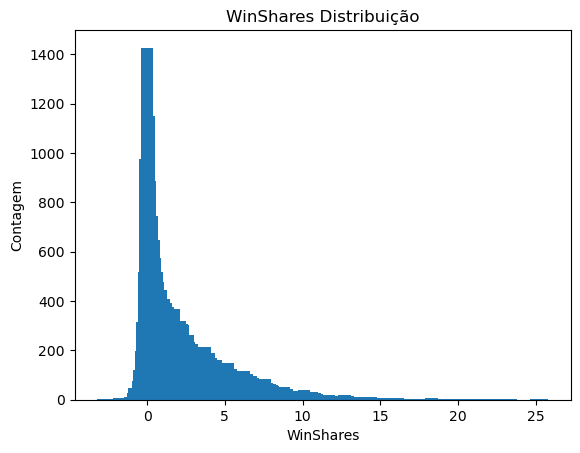

In [40]:
# Contar a quantidade de cada valor na coluna 'WinShares'
winshares_counts = Counter(df_nba['WinShares'])

# Criar o gráfico com matplotlib
plt.bar(winshares_counts.keys(), winshares_counts.values())
plt.xlabel('WinShares')
plt.ylabel('Contagem')
plt.title('WinShares Distribuição')
plt.show()

In [41]:
# Exibindo a média de valores das features em relação à feature 'WinShares'
df_nba.select_dtypes(include=['number']).groupby('WinShares').mean()

,Ano,Idade,Jogos,TrueShootingPercentage,FreeThrowRate,OffensiveWinShares,DefensiveWinShares,FieldGoals,FieldGoalAttempts,FieldGoalPercentage,TwoPointFieldGoals,TwoPointFieldGoalAttempts,TwoPointFieldGoalPercentage,EffectiveFieldGoalPercentage,FreeThrows,FreeThrowAttempts,FreeThrowPercentage,Assists,PersonalFouls,Points
WinShares,,,,,,,,,,,,,,,,,,,,
-2.8,1961.0,26.0,69.0,0.318,0.130,-5.10,2.20,230.0,768.0,0.2990,230.0,768.0,0.299,0.2990,56.0,100.0,0.560,74.0,197.0,516.0
-2.5,1950.0,21.0,61.0,0.290,0.209,-3.20,0.70,111.0,425.0,0.2610,111.0,425.0,0.261,0.2610,47.0,89.0,0.528,91.0,91.0,269.0
-2.2,1963.0,28.0,77.0,0.404,0.169,-3.00,0.80,366.0,966.0,0.3790,366.0,966.0,0.379,0.3790,107.0,163.0,0.656,78.0,230.0,839.0
-2.1,1994.0,21.5,64.5,0.427,0.192,-2.85,0.75,319.0,850.0,0.3765,282.0,734.0,0.384,0.3965,115.0,165.5,0.704,244.0,143.0,790.0
-2.0,1950.0,28.0,54.0,0.340,0.245,-1.60,-0.40,163.0,527.0,0.3090,163.0,527.0,0.309,0.3090,71.0,129.0,0.550,112.0,169.0,397.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22.3,1971.0,23.0,82.0,0.606,0.370,17.00,5.30,1063.0,1843.0,0.5770,1063.0,1843.0,0.577,0.5770,470.0,681.0,0.690,272.0,264.0,2596.0
23.1,1962.0,25.0,80.0,0.536,0.431,17.10,6.00,1597.0,3159.0,0.5060,1597.0,3159.0,0.506,0.5060,835.0,1363.0,0.613,192.0,123.0,4029.0
23.4,1951.0,26.0,68.0,0.509,0.453,16.00,7.40,678.0,1584.0,0.4280,678.0,1584.0,0.428,0.4280,576.0,717.0,0.803,208.0,308.0,1932.0


Observando a saída gerada acima, percebe-se algumas tendências e correlaçoes entre um melhor valor de 'WinShares' com algumas colunas, como a 'OffensiveWinShares', 'DefensiveWinShares', 'FielGoals', entre outras. Acredito ser importante essa visualização para se obter uma ideia de quais colunas podem impactar para um WinShare maior ou menor.

In [ ]:
# criando visualizações box plot para cada feature numérica.
plt.figure(figsize=(15, 20)) #Configura o tamanho do box plot

# Loop para cada uma das features
for i, column in enumerate(df_nba.select_dtypes(include = 'number').columns, 1):
    # Na linha acima, 'enumerate' está iterando sobre dois parâmetros, o 'df_nba.select_dtypes(include = "number").columns' e o '1'.
    # O primeiro parâmetro é o objeto no qual enumerate vai iterar, ou seja, as colunas numéricas. O segundo parâmetro é o índice, ou seja, inicia-se em 1.
    plt.subplot(6, 4, i) # Ajustável para a quantidade de features que eu estou trabalhando
    sns.boxplot(data = df_nba[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [ ]:
# Plotando um box plot de uma coluna específica (nesse caso a coluna 'WinShares')
df_nba['WinShares'].plot(kind = 'box')

Olhando acima, no conjunto de boxplots criados e no boxplot específico da coluna WinShares, percebemos muitos outliers. Mas será que são outliers mesmo? Ao ver esses dados da coluna WinShares e associá-los ao seu histograma, dá para perceber que há uma cauda a direita, ou seja, uma diminuição na contagem de dados com o aumento do valor, mas que não necessariamente sejam outliers. 

## Feature selection

In [55]:
# Separação das variáveis dependentes e independente
X = df_nba.drop(['WinShares', 'Posicao'], axis = 1) # X recebe todas as colunas menos a 'WinShares' e 'Posicao'. Variáveis independentes
Y = df_nba['WinShares'] # y armazena a variável que preciso prever (variável target). Variável dependente

In [59]:
# verificando se a variável X está correta
X

,Ano,Idade,Jogos,TrueShootingPercentage,FreeThrowRate,OffensiveWinShares,DefensiveWinShares,FieldGoals,FieldGoalAttempts,FieldGoalPercentage,TwoPointFieldGoals,TwoPointFieldGoalAttempts,TwoPointFieldGoalPercentage,EffectiveFieldGoalPercentage,FreeThrows,FreeThrowAttempts,FreeThrowPercentage,Assists,PersonalFouls,Points
0,1950,31.0,63,0.368,0.467,-0.1,3.6,144,516,0.279,144,516,0.279,0.279,170,241,0.705,176,217,458
1,1950,29.0,49,0.435,0.387,1.6,0.6,102,274,0.372,102,274,0.372,0.372,75,106,0.708,109,99,279
2,1950,25.0,67,0.394,0.259,0.9,2.8,174,499,0.349,174,499,0.349,0.349,90,129,0.698,140,192,438
3,1950,24.0,15,0.312,0.395,-0.5,-0.1,22,86,0.256,22,86,0.256,0.256,19,34,0.559,20,29,63
4,1950,24.0,13,0.308,0.378,-0.5,-0.1,21,82,0.256,21,82,0.256,0.256,17,31,0.548,20,27,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24619,2017,24.0,62,0.604,0.442,3.4,2.2,253,443,0.571,253,442,0.572,0.571,133,196,0.679,99,189,639
24620,2017,27.0,51,0.508,0.247,0.5,0.6,78,158,0.494,78,157,0.497,0.494,22,39,0.564,42,61,178
24621,2017,20.0,19,0.346,0.161,-0.1,0.1,10,31,0.323,10,31,0.323,0.323,3,5,0.600,4,17,23
24622,2017,22.0,44,0.503,0.181,-0.3,0.8,88,221,0.398,55,122,0.451,0.473,31,40,0.775,36,78,240


In [58]:
# verificando se a variável Y está correta
Y

0        3.5
1        2.2
2        3.6
3       -0.6
4       -0.6
        ... 
24619    5.6
24620    1.0
24621    0.0
24622    0.5
24623    1.1
Name: WinShares, Length: 23697, dtype: float64

In [66]:
# Verificando a importância de cada feature 
clf_etr = ExtraTreesRegressor() # Inicialização do classificador (regressor!!)
clf_etr.fit(X, Y) # treinamento do modelo usando as features
escore = clf_etr.feature_importances_ # 'feature_importances_' armazena um array com a importância relativa de cada feature

print(escore)

[2.99337567e-04 1.73473167e-04 7.74077776e-03 1.17803221e-02
 7.90536997e-04 3.72908702e-01 1.21643130e-01 7.31455573e-02
 3.24953969e-02 9.49641560e-04 5.55984683e-02 2.98662318e-02
 2.28452320e-03 3.22443348e-03 1.15296335e-01 3.88592334e-02
 3.21490363e-04 2.70671126e-04 4.99005581e-03 1.27361682e-01]


## Divisão do dataset para treinamento

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

# Problema de regressão

Em relação ao item 5:

5) Para o dataset que escolheu, defina se o problema é de **classificação**, **regressão** ou **previsão de séries temporais**. Justifique a sua escolha dentro do notebook.
### O probelma é de regressão, pois preciso prever alguma coisa, nesse caso os 'WinShares'. Além disso, estou trabalhando com dados numéricos, e regressão trabalha com dados numéricos.

In [69]:
# Criação de um df vazio com duas colunas para receber o resultado do modelo de ML
df_resultado = pd.DataFrame(columns = ['Modelo', 'Score'])

## RandomForestRegressor

In [74]:
# Treinamento do dataset com o RandomForestRegressor
rdforest = RandomForestRegressor() # Inicializa o modelo de Regressão
rdforest.fit(X_train, y_train) # Treina o modelo com o conjunto de treino (X_train e y_train)

predicao = rdforest.predict(X_test) # Faz previsões para o conjunto de teste

In [78]:
df_resultado.loc[len(df_resultado)] = ['RandomForestRegressor', mean_squared_error(y_test, predicao)]
df_resultado

,Modelo,Score
0,RandomForestRegressor,0.012473


In [84]:
# df comparando o real com o predito
df_test = X_test.copy()
df_test['WinShares_Real'] = y_test
df_test['WinShares_Predicao'] = rdforest.predict(X_test)
df_test.sample(15)

,Ano,Idade,Jogos,TrueShootingPercentage,FreeThrowRate,OffensiveWinShares,DefensiveWinShares,FieldGoals,FieldGoalAttempts,FieldGoalPercentage,...,TwoPointFieldGoalPercentage,EffectiveFieldGoalPercentage,FreeThrows,FreeThrowAttempts,FreeThrowPercentage,Assists,PersonalFouls,Points,WinShares_Real,WinShares_Predicao
6679,1982,26.0,71,0.506,0.294,0.8,0.9,116,245,0.473,...,0.473,0.473,48,72,0.667,89,101,280,1.6,1.677
5443,1979,23.0,80,0.496,0.288,1.7,2.0,246,549,0.448,...,0.448,0.448,122,158,0.772,103,166,614,3.7,3.745
13746,1998,27.0,39,0.461,0.267,-0.4,0.7,56,135,0.415,...,0.418,0.415,27,36,0.750,22,80,139,0.3,0.299
17286,2005,23.0,40,0.575,0.395,0.9,0.2,65,157,0.414,...,0.456,0.522,48,62,0.774,37,56,212,1.1,1.145
11237,1993,28.0,20,0.501,0.331,0.3,0.3,73,163,0.448,...,0.453,0.448,41,54,0.759,24,64,187,0.6,0.595
19086,2008,29.0,42,0.489,0.318,-0.7,1.6,225,512,0.439,...,0.444,0.439,121,163,0.742,93,129,571,0.9,0.841
7319,1984,26.0,50,0.570,0.518,0.2,1.2,189,342,0.553,...,0.553,0.553,101,177,0.571,63,188,479,1.4,1.416
19767,2009,23.0,37,0.478,0.247,-0.2,0.2,31,85,0.365,...,0.350,0.424,18,21,0.857,29,45,90,0.0,-0.011
13578,1998,27.0,72,0.542,0.402,3.0,3.6,200,420,0.476,...,0.554,0.499,117,169,0.692,163,238,536,6.6,6.620
15520,2002,20.0,29,0.400,0.286,-0.1,0.5,23,70,0.329,...,0.419,0.364,12,20,0.600,15,18,63,0.4,0.419


## Conclusão

Acima foi realizado o treinamento e o teste. A técnica usada foi o RandomForestRegressor. O score foi de 0.012473, o que é baixo. Só achei estranho, pois fui vendo vários samples e mais samples pra comparar o valor real com o predito, e são muito próximos sempre, então gostaria de testar técnicas que avaliassem esse resultado e sua confiabilidade. Além disso é possível utilizar outros modelos de treinamento. Nessa técnica não utilizei padronização de escala, como o StandardScaler, então é possível melhorar (ou obter) resultados diferentes com diferesntes ajustes.

## Referências

- Materiais do professor Wellington R.
- Documentação das bibliotecas